In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"

In [2]:
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import optimizers
from keras.models import Sequential,load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np 
from keras.callbacks import ModelCheckpoint, History
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns 
from keras import applications
from keras.models import Sequential, Model 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Using TensorFlow backend.


In [2]:
img_width = 256
img_height = 256
train_data_dir = 'training'
valid_data_dir = 'validation'
fine_tuned_model_path = 'ft_model.h5'
train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
nb_train_samples = sum(train_samples)
print(nb_train_samples)
validation_samples = [len(os.listdir(valid_data_dir+'/'+i)) for i in sorted(os.listdir(valid_data_dir))]
nb_validation_samples = sum(validation_samples)
print(nb_validation_samples)
epochs=50
batch_size = 8

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'training'

In [4]:
model = applications.DenseNet201(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

for layer in model.layers[:25]:
    layer.trainable = False
    
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

model_final = Model(input = model.input, output = predictions)

model_final.compile(loss = "binary_crossentropy", optimizer = optimizers.SGD(lr=0.00001, momentum=0.9), metrics=["accuracy"])

train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range=0.2,
shear_range=0.2,
rotation_range=40)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.2,
width_shift_range = 0.2,
height_shift_range=0.2,
shear_range=0.2,
rotation_range=40)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
valid_data_dir,
target_size = (img_height, img_width),
class_mode = "binary")

checkpoint = ModelCheckpoint("Damaged_densenet_final.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint]) #,early

/home/dtilak/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  del sys.path[0]


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


/home/dtilak/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/dtilak/.local/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=230, validation_data=<keras_pre..., validation_steps=460, epochs=50, callbacks=[<keras.ca...)`


Epoch 1/50
230/230 [==============================] - 336s 1s/step - loss: 0.6587 - acc: 0.6234 - val_loss: 0.4952 - val_acc: 0.7672

Epoch 00001: val_acc improved from -inf to 0.76721, saving model to Damaged_densenet_final.h5
Epoch 2/50
230/230 [==============================] - 297s 1s/step - loss: 0.4974 - acc: 0.7663 - val_loss: 0.4217 - val_acc: 0.8111

Epoch 00002: val_acc improved from 0.76721 to 0.81106, saving model to Damaged_densenet_final.h5
Epoch 3/50
230/230 [==============================] - 298s 1s/step - loss: 0.4445 - acc: 0.7995 - val_loss: 0.3949 - val_acc: 0.8230

Epoch 00003: val_acc improved from 0.81106 to 0.82298, saving model to Damaged_densenet_final.h5
Epoch 4/50
230/230 [==============================] - 296s 1s/step - loss: 0.4230 - acc: 0.8250 - val_loss: 0.4260 - val_acc: 0.7960

Epoch 00004: val_acc did not improve from 0.82298
Epoch 5/50
230/230 [==============================] - 296s 1s/step - loss: 0.3871 - acc: 0.8326 - val_loss: 0.3561 - val_acc: 

230/230 [==============================] - 280s 1s/step - loss: 0.2231 - acc: 0.9130 - val_loss: 0.3119 - val_acc: 0.8661

Epoch 00043: val_acc did not improve from 0.88853
Epoch 44/50
230/230 [==============================] - 282s 1s/step - loss: 0.2123 - acc: 0.9190 - val_loss: 0.3297 - val_acc: 0.8593

Epoch 00044: val_acc did not improve from 0.88853
Epoch 45/50
230/230 [==============================] - 282s 1s/step - loss: 0.2255 - acc: 0.9136 - val_loss: 0.3267 - val_acc: 0.8587

Epoch 00045: val_acc did not improve from 0.88853
Epoch 46/50
230/230 [==============================] - 282s 1s/step - loss: 0.1939 - acc: 0.9245 - val_loss: 0.3771 - val_acc: 0.8363

Epoch 00046: val_acc did not improve from 0.88853
Epoch 47/50
230/230 [==============================] - 282s 1s/step - loss: 0.2104 - acc: 0.9136 - val_loss: 0.3297 - val_acc: 0.8597

Epoch 00047: val_acc did not improve from 0.88853
Epoch 48/50
230/230 [==============================] - 282s 1s/step - loss: 0.2040 - ac

In [5]:
def car_categories_gate(image_path, model):
    urllib.request.urlretrieve(image_path, 'save.jpg') # or other way to upload image
    img = load_img('save.jpg', target_size=(256, 256)) # this is a PIL image 
    x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
    x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
    pred = model.predict(x)
    plt.imshow(img)
    plt.show()
    print ("Validating that damage exists...")
    print (pred)
    if pred[0][0] <=.5:
        print ("Validation complete - proceed to location and severity determination")
    else:
        print ("Are you sure that your car is damaged? Please submit another picture of the damage.")
        print ("Hint: Try zooming in/out, using a different angle or different lighting")

In [6]:
car_categories_gate('https://www.nerdwallet.com/blog/wp-content/uploads/2015/12/exterior-car-damage-384x233.jpg', model_final)

NameError: name 'model_final' is not defined

In [7]:
car_categories_gate('http://1.bp.blogspot.com/-ToQS-qIxYbo/UDNuV5OcVQI/AAAAAAAABdo/tjeQywWiOo0/s200/Key+scratch.jpg', model_final)

NameError: name 'model_final' is not defined

In [8]:
car_categories_gate('https://st.motortrend.com/uploads/sites/10/2017/02/2017-ford-taurus-sho-sedan-angular-front.png', model_final)

NameError: name 'model_final' is not defined

In [9]:
car_categories_gate('https://www.cars.com/cstatic-images/car-pictures/xl/usc70fos131c021001.png',model_final)

NameError: name 'model_final' is not defined

In [10]:
car_categories_gate('https://upload.wikimedia.org/wikipedia/en/thumb/1/16/Crash_Bandicoot.png/220px-Crash_Bandicoot.png',model_final)

NameError: name 'model_final' is not defined

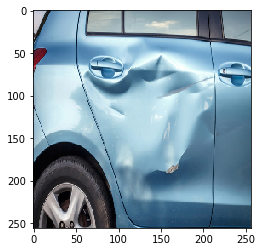

Validating that damage exists...
[[0.02163259]]
Validation complete - proceed to location and severity determination


In [23]:
car_categories_gate('https://boygeniusreport.files.wordpress.com/2017/09/dented-car.jpg?quality=98&strip=all&w=782',model_final)

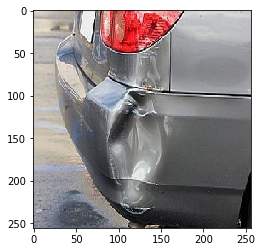

Validating that damage exists...
[[0.14210317]]
Validation complete - proceed to location and severity determination


In [24]:
car_categories_gate('https://img-aws.ehowcdn.com/600x400/cpi.studiod.com/www_ehow_com/i.ehow.com/images/a02/7p/bi/repair-car-dent-800x800.jpg',model_final)

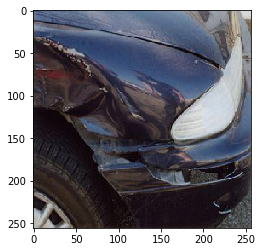

Validating that damage exists...
[[0.0873558]]
Validation complete - proceed to location and severity determination


In [25]:
car_categories_gate('https://cf.ltkcdn.net/cars/images/std/71228-400x284-Cardents.jpg',model_final)

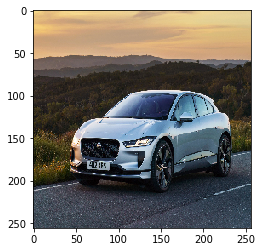

Validating that damage exists...
[[0.99946755]]
Are you sure that your car is damaged? Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


In [26]:
car_categories_gate('https://media.wired.com/photos/5b86fce8900cb57bbfd1e7ee/master/pass/Jaguar_I-PACE_S_Indus-Silver_065.jpg',model_final)

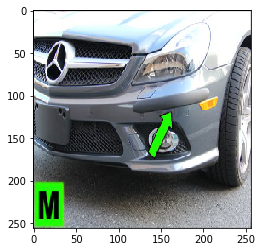

Validating that damage exists...
[[0.9352682]]
Are you sure that your car is damaged? Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting


In [27]:
car_categories_gate('https://images-na.ssl-images-amazon.com/images/I/51dhUSCzBfL.jpg',model_final)

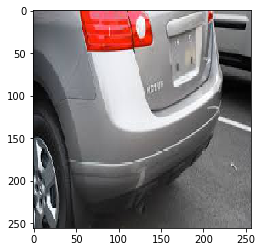

Validating that damage exists...
[[0.288748]]
Validation complete - proceed to location and severity determination


In [28]:
car_categories_gate('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpG_0UHGpCG8FE9ggGu2YOx39eBgJnTIDEUmS6g5V38Ltfn7Mz',model_final)